In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# GUARANTEED FIX: Use the full path as seen in the system
df = pd.read_csv('C:/Users/muthu/CYBERPROJECT/data/raw/phishing_dataset/email_phishing_data.csv')

# Run initial inspection
df.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


--- DataFrame 'df' Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB

--- Missing Value Check (Should be 0) ---
num_words             0
num_unique_words      0
num_stopwords         0
num_links             0
num_unique_domains    0
dtype: int64

--- Class Balance in 'df' (Malicious vs. Legitimate) ---
label
0    98.675993
1     1.324007
Name: proporti

C:\Users\muthu\AppData\Local\Temp\ipykernel_9272\3458903732.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balance_df.index, y=balance_df.values, palette=['skyblue', 'salmon'])


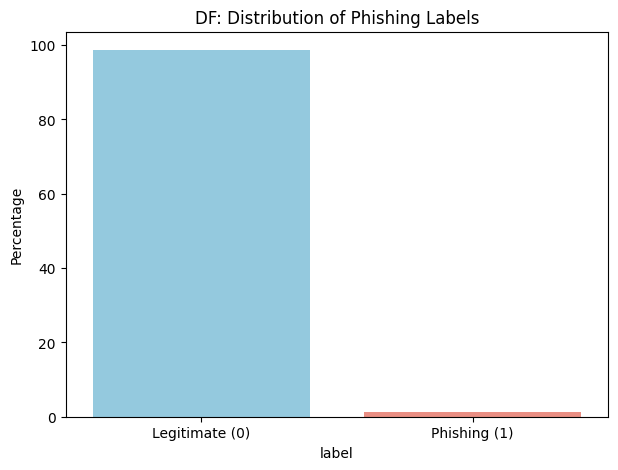

In [7]:
# --- DataFrame df: Data Quality Check ---
print("--- DataFrame 'df' Info ---")
df.info()

print("\n--- Missing Value Check (Should be 0) ---")
print(df.isnull().sum().sort_values(ascending=False).head())

# --- Class Balance Check ---
print("\n--- Class Balance in 'df' (Malicious vs. Legitimate) ---")
balance_df = df['label'].value_counts(normalize=True) * 100
print(balance_df)

# Visualize the class balance
plt.figure(figsize=(7, 5))
sns.barplot(x=balance_df.index, y=balance_df.values, palette=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Legitimate (0)', 'Phishing (1)'])
plt.title('DF: Distribution of Phishing Labels')
plt.ylabel('Percentage')
plt.show()



--- Descriptive Stats for DF Num Links ---
count    524846.000000
mean          0.895588
std           5.603001
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
90%           1.000000
95%           3.000000
99%          18.000000
max         824.000000
Name: num_links, dtype: float64


C:\Users\muthu\AppData\Local\Temp\ipykernel_14648\2653376401.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='num_links', data=df, palette=['skyblue', 'salmon'])


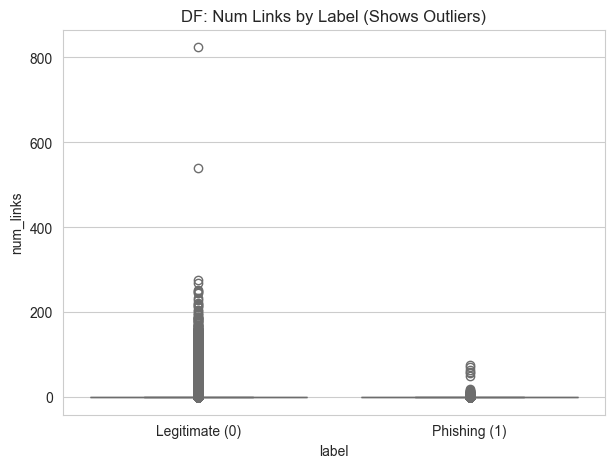

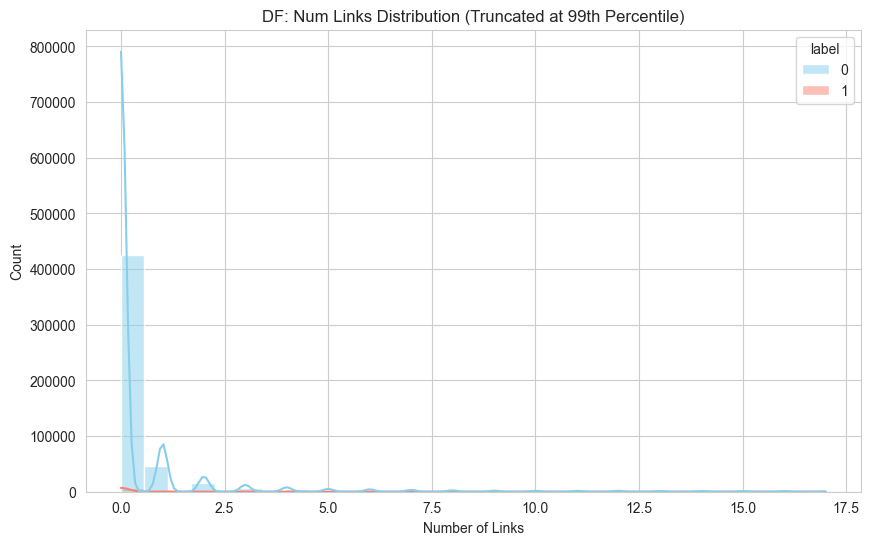

In [18]:
# --- Feature Analysis for 'df': Num Links ---
print("\n--- Descriptive Stats for DF Num Links ---")
# Use a custom percentile range since the data is heavily skewed by the imbalance
print(df['num_links'].describe(percentiles=[.25, .5, .75, .90, .95, .99]))

# Visualize the distribution of Num Links by class (using Box Plot for outliers)
plt.figure(figsize=(7, 5))
sns.boxplot(x='label', y='num_links', data=df, palette=['skyblue', 'salmon'])
plt.title('DF: Num Links by Label (Shows Outliers)')
plt.xticks([0, 1], ['Legitimate (0)', 'Phishing (1)'])
plt.show()

# Visualize the distribution (Histogram - may be skewed due to high counts)
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df[df['num_links'] < df['num_links'].quantile(0.99)], # Only look at values below the 99th percentile to see detail
    x='num_links', 
    hue='label', 
    bins=30, 
    kde=True,
    palette=['skyblue', 'salmon']
)
plt.title('DF: Num Links Distribution (Truncated at 99th Percentile)')
plt.xlabel('Number of Links')
plt.show()

In [8]:
df1 = pd.read_csv('C:/Users/muthu/CYBERPROJECT/data/raw/email-phishing-dataset/email_phishing_data.csv')

# Run initial inspection
df1.head()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0
3,6,6,2,0,0,0,0,0,0
4,9,9,2,0,0,0,0,0,0


--- DataFrame 'df1' Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB

--- Missing Value Check (Should be 0) ---
num_words             0
num_unique_words      0
num_stopwords         0
num_links             0
num_unique_domains    0
dtype: int64

--- Class Balance in 'df1' (Malicious vs. Legitimate) ---
label
0    98.675993
1     1.324007
Name: propor

C:\Users\muthu\AppData\Local\Temp\ipykernel_9272\3686265339.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balance_df1.index, y=balance_df1.values, palette=['lightgreen', 'tomato'])


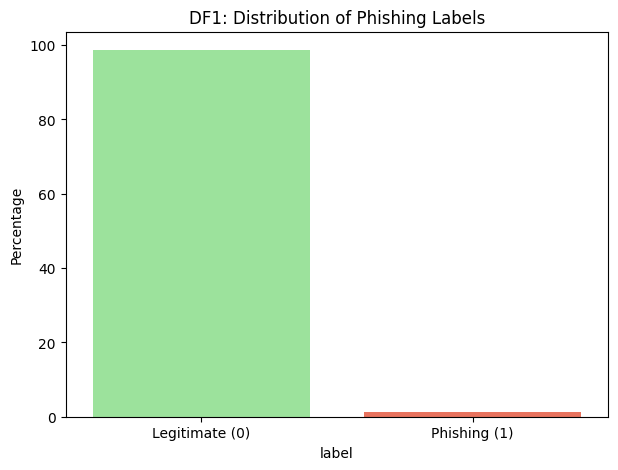

In [9]:
# --- DataFrame df1: Data Quality Check ---
print("--- DataFrame 'df1' Info ---")
df1.info()

print("\n--- Missing Value Check (Should be 0) ---")
print(df1.isnull().sum().sort_values(ascending=False).head())

# --- Class Balance Check ---
print("\n--- Class Balance in 'df1' (Malicious vs. Legitimate) ---")
balance_df1 = df1['label'].value_counts(normalize=True) * 100
print(balance_df1)

# Visualize the class balance
plt.figure(figsize=(7, 5))
sns.barplot(x=balance_df1.index, y=balance_df1.values, palette=['lightgreen', 'tomato'])
plt.xticks([0, 1], ['Legitimate (0)', 'Phishing (1)'])
plt.title('DF1: Distribution of Phishing Labels')
plt.ylabel('Percentage')
plt.show()

--- Descriptive Stats for DF1 Num Links ---
count    524846.000000
mean          0.895588
std           5.603001
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
90%           1.000000
95%           3.000000
99%          18.000000
max         824.000000
Name: num_links, dtype: float64


C:\Users\muthu\AppData\Local\Temp\ipykernel_9272\913809913.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='num_links', data=df1, palette=['lightgreen', 'tomato'])


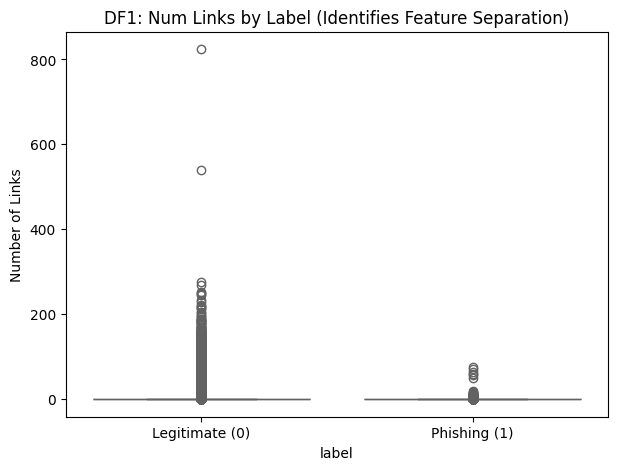

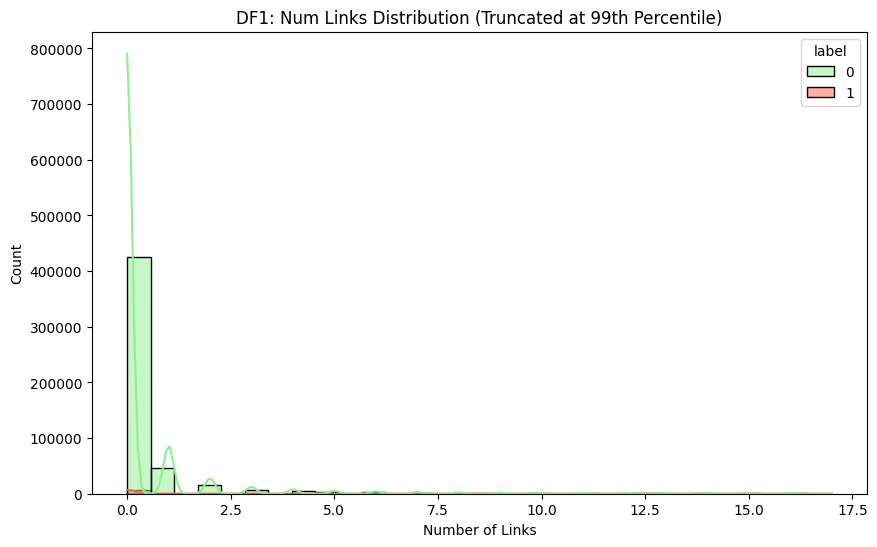

In [10]:
# --- Feature Analysis for 'df1': Num Links ---
print("--- Descriptive Stats for DF1 Num Links ---")

# Use descriptive stats with custom percentiles to analyze the highly skewed link count data
print(df1['num_links'].describe(percentiles=[.25, .5, .75, .90, .95, .99]))

# Visualize the relationship between link count and the phishing label using a Box Plot.
# This helps identify if phishing samples have significantly more outliers/higher medians.
plt.figure(figsize=(7, 5))
sns.boxplot(x='label', y='num_links', data=df1, palette=['lightgreen', 'tomato'])
plt.title('DF1: Num Links by Label (Identifies Feature Separation)')
plt.xticks([0, 1], ['Legitimate (0)', 'Phishing (1)'])
plt.ylabel('Number of Links')
plt.show()

# Visualize the distribution using a Histogram.
# We truncate the data at the 99th percentile to prevent extreme outliers (max) from squashing the plot.
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df1[df1['num_links'] < df1['num_links'].quantile(0.99)], 
    x='num_links', 
    hue='label', 
    bins=30, 
    kde=True,
    palette=['lightgreen', 'tomato']
)
plt.title('DF1: Num Links Distribution (Truncated at 99th Percentile)')
plt.xlabel('Number of Links')
plt.show()